In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [159]:
df = pd.read_csv('pretest_data.csv')

In [160]:
df.isnull().sum(0)

video_id                      0
channel_id                    0
published_date                0
category_name                 0
duration                      0
tags                        370
description                  40
on_trending_date              0
off_trending_date             0
on_rank                       0
off_rank                      0
on_views                      0
off_views                     0
on_likes                      0
off_likes                     0
on_dislikes                   0
off_dislikes                  0
on_comments                   0
off_comments                  0
on_channel_subscribers        0
off_channel_subscribers       0
on_channel_total_views        0
off_channel_total_views       0
on_channel_total_videos       0
off_channel_total_videos      0
dtype: int64

In [161]:
## 조회수 0인데 인기  1 순위 결측치
print(f'조회수 결측치 총: {len(df[df.on_views == 0])} 개')
df = df[df.on_views != 0]

#좋아요, 싫어요 놓은 결측치 제거
print(f'좋아요 결측치 총: {len(df[df.on_likes == 0])} 개')
df = df[df.on_likes!=0]

## 채널 구독자 비공개 결측치 제거
print(f'구독자수 결측치 총: {len(df[df.on_channel_subscribers == 0])} 개')
df = df[df.on_channel_subscribers!=0]

## 댓글 결측치 (인기 동영상일때는 공개하고 인기동영상 끝날때 숨김처리 댓글도 결측치로봄)
print(f'ON 댓글 결측치 총: {len(df[df.off_comments == 0])} 개')
print(f'OFF 댓글 결측치 총: {len(df[df.on_comments == 0])} 개')
df = df[df.off_comments!=0]
df = df[df.on_comments!=0]

print()
print(f'현재 결측치 제거 후 데이터 수: {len(df)} 개')

조회수 결측치 총: 1 개
좋아요 결측치 총: 21 개
구독자수 결측치 총: 63 개
on 댓글 결측치 총: 15 개
off 댓글 결측치 총: 15 개

현재 결측치 제거 후 데이터 수: 2543 개


## 총 100개 결측치 제거하여
## 현재 2543개 row데이터 존재

In [162]:
df.describe()

,on_rank,off_rank,on_views,off_views,on_likes,off_likes,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
count,2543.000000,2543.000000,2.543000e+03,2.543000e+03,2.543000e+03,2.543000e+03,2543.000000,2543.000000,2.543000e+03,2.543000e+03,2.543000e+03,2.543000e+03,2.543000e+03,2.543000e+03,2543.000000,2543.000000
mean,20.204483,35.896972,9.564090e+05,1.442030e+06,5.584124e+04,7.002500e+04,536.537947,866.361384,9.288993e+03,1.144061e+04,1.792932e+06,1.799078e+06,8.877168e+08,8.903450e+08,9611.933936,9563.497837
std,12.879605,10.386531,3.248665e+06,6.956796e+06,3.300059e+05,5.078619e+05,2098.451600,4836.510839,1.177946e+05,1.605460e+05,5.635990e+06,5.659544e+06,2.556529e+09,2.562932e+09,43970.485247,43914.158383
min,1.000000,1.000000,5.329700e+04,5.329700e+04,4.230000e+02,4.230000e+02,5.000000,8.000000,1.000000e+00,1.000000e+00,4.990000e+02,4.990000e+02,6.384500e+04,6.384500e+04,1.000000,1.000000
25%,9.000000,28.000000,2.383735e+05,3.098825e+05,4.319000e+03,5.063500e+03,89.000000,111.000000,5.205000e+02,6.075000e+02,1.655000e+05,1.695000e+05,3.843337e+07,3.934367e+07,121.000000,121.500000
50%,19.000000,37.000000,4.293730e+05,5.724840e+05,7.912000e+03,9.608000e+03,162.000000,214.000000,1.161000e+03,1.323000e+03,4.820000e+05,4.850000e+05,1.223029e+08,1.237807e+08,330.000000,330.000000
75%,30.000000,45.000000,8.299205e+05,1.128512e+06,1.691700e+04,2.086400e+04,316.500000,435.000000,2.721000e+03,3.153500e+03,1.315000e+06,1.320000e+06,4.946873e+08,4.953319e+08,1266.000000,1264.500000
max,50.000000,50.000000,9.727667e+07,2.488763e+08,8.097173e+06,1.575992e+07,37349.000000,133721.000000,4.625133e+06,6.659938e+06,5.890000e+07,5.940000e+07,2.170125e+10,2.170568e+10,545577.000000,545764.000000


In [163]:
print(df.published_date.min(), df.published_date.max())
print(df.on_trending_date.min(), df.on_trending_date.max())
print(df.off_trending_date.min(), df.off_trending_date.max())
# published_date

# on_trending_date

# off_trending_date

2021-03-25 2021-07-29
2021-03-27 2021-07-31
2021-04-01 2021-07-31


In [164]:
df = pretest_data

In [165]:
## published_on_date: 동영상 올린 날짜와 인기동영상 올라간 날짜 차이
## on_off_date:인기동영상 올라간 날짜와 내려간 날짜 날짜

df[['published_date','on_trending_date']] = df[['published_date','on_trending_date']].apply(pd.to_datetime) #if conversion required
df['published_on_date'] = (df['on_trending_date'] - df['published_date']).dt.days

df[['on_trending_date','off_trending_date']] = df[['on_trending_date','off_trending_date']].apply(pd.to_datetime) #if conversion required
df['on_off_date'] = (df['off_trending_date'] - df['on_trending_date']).dt.days

In [166]:
df.on_off_date.max()

7

In [167]:
print(df.published_on_date.min(), df.published_on_date.max())

1 6


<AxesSubplot:>

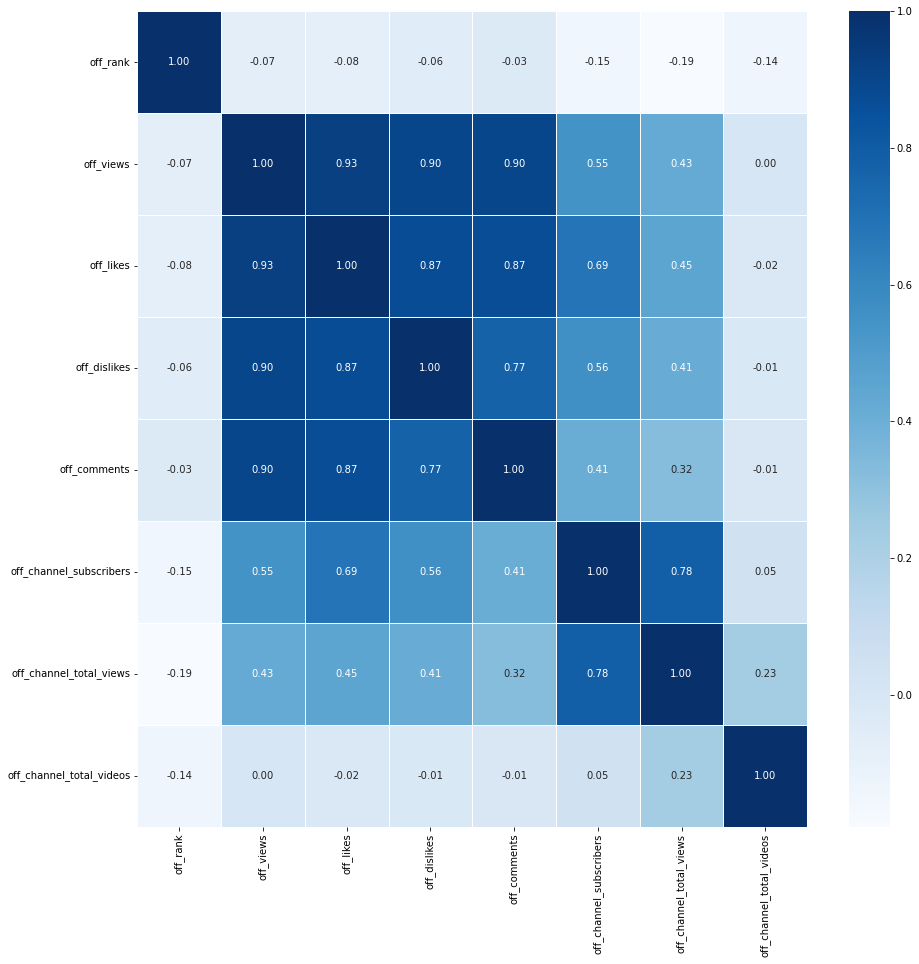

In [5]:
# pretest_data.corr()

plt.figure(figsize=(15,15))
sns.heatmap(data = df[['off_rank','off_views','off_likes','off_dislikes','off_comments','off_channel_subscribers','off_channel_total_views','off_channel_total_videos']].corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

<AxesSubplot:>

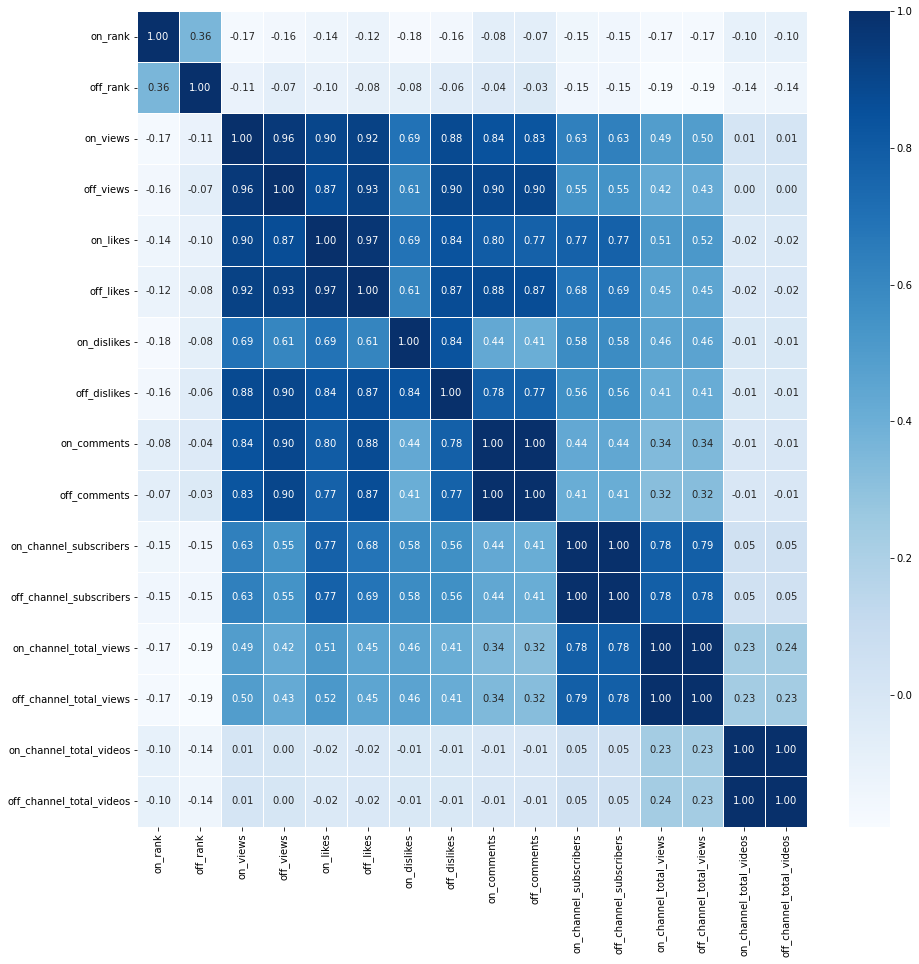

In [6]:
plt.figure(figsize=(15,15))
sns.heatmap(data = pretest_data.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [7]:
pretest_data.head()

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04,13,...,792,1014,10373,10720,1080000,1080000,685992413,687485021,5947,5950
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27,28,...,121,154,1083,1173,627000,628000,75327083,75685030,70,70
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22,1,...,162,233,696,1006,5750000,5750000,5424167911,5431617741,34270,34341
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04,18,...,30,30,416,416,94200,94200,71160125,71160125,224,224
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09,11,...,112,143,687,772,47600,49200,6993451,7607123,21,21


In [8]:
pretest_data_slice = pretest_data[['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',]]
pretest_data_slice

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date
0,V-0db,CH49ta0,2021-07-01,Entertainment,PT8M20S,SiriusXM|Sirius XM|Sirius|SXM|BIGHIT|빅히트|방탄소년단...,BTS performs their hit songs ‘Dynamite’ and ‘B...,2021-07-03,2021-07-04
1,V-1XL,CHZVD--,2021-06-24,Entertainment,PT9M17S,치킨불냉면|치킨|불냉면|냉면,영상에 나오는 캐릭터의 이름은 파도비 입니다. 고양이가 아니라 파란 도깨비입니다. ...,2021-06-26,2021-06-27
2,V-4fa,CH9w-h_,2021-07-17,Entertainment,PT7M39S,NaN,"거세 구형, 성 충동 제거를 위한 엄벌 치료 VS 인권 보호해야고민 끝에 내린 강요...",2021-07-19,2021-07-22
3,V-5ip,CHUQVGX,2021-06-02,Sports,PT6M40S,News Network|SBS SPORTSMUG|SPORTSMUG|스포츠머그|축구|...,세계 최초 9회 연속 올림픽 본선 진출! 그동안 한국 축구의 역사를 써내려 간 올림...,2021-06-04,2021-06-04
4,V-5jn,CHhI3EX,2021-07-06,Sports,PT11M27S,이천수|심판도전기|축구심판,찾아 뵐 심판분들이 이제 18명정도 남았네요,2021-07-08,2021-07-09
...,...,...,...,...,...,...,...,...,...
2639,VzwuB,CH69uMh,2021-05-09,Comedy,PT2M34S,아프리카tv|봉준|와꾸대장봉준|BJ|컨텐츠|클립,BJ봉준입니다 저는 2021년 5월 10일 새벽 1시경 동료BJ들과 방송을 진행하던...,2021-05-11,2021-05-14
2640,VzxuL,CHhbE5O,2021-07-29,Comedy,PT6M39S,장삐쭈|삐쭈|ㅋㅋㅋ|삐쮸|장삐쮸|병맛더빙|더빙|웃긴동영상|꿀잼|신병|장삐쭈 단편선|...,"스튜디오 장삐쭈장삐쭈, 정영준, 안류천, 포포, 윤성원, 허혜원, 정대준, 지정민,...",2021-07-31,2021-07-31
2641,VzygR,CHO4RG1,2021-04-20,Science & Technology,PT11M45S,아이패드 프로|아이패드 프로5|아이패드 프로 5세대|신형 아이맥|아이맥|iMac|에...,"애플 봄 스페셜 이벤트를 통해서 공개된 아이패드 프로 5세대, 신형 아이맥, 에어태...",2021-04-22,2021-04-22
2642,Vzz6W,CHYeeEw,2021-04-26,Entertainment,PT11M27S,고요 속의 외침|뽕숭아학당|슬기로운캠핑생활|아는형님|미스터트롯|임영웅|영탁|장민호|...,비빈 닭↘고↗기 부터이진관 덕후까지레전드 꿀잼!!#뽕숭아학당 #미스터트롯 #고요속의...,2021-04-28,2021-04-29


## 데이터 컬럼 종류

In [10]:
print(pretest_data.keys(), pretest_data.shape)

# video_id,channel_id,published_date,category_name,tags,on_trending_date,off_trending_date,on_rank,off_rank

Index(['video_id', 'channel_id', 'published_date', 'category_name', 'duration',
       'tags', 'description', 'on_trending_date', 'off_trending_date',
       'on_rank', 'off_rank', 'on_views', 'off_views', 'on_likes', 'off_likes',
       'on_dislikes', 'off_dislikes', 'on_comments', 'off_comments',
       'on_channel_subscribers', 'off_channel_subscribers',
       'on_channel_total_views', 'off_channel_total_views',
       'on_channel_total_videos', 'off_channel_total_videos'],
      dtype='object') (2644, 25)


# 카테고리 종류

In [11]:
print(f'{pretest_data.category_name.unique()} \n\n unique 개수: {len(pretest_data.category_name.unique())}')

['Entertainment' 'Sports' 'Music' 'People & Blogs' 'Science & Technology'
 'Education' 'Howto & Style' 'News & Politics' 'Gaming' 'Comedy'
 'Pets & Animals' 'Travel & Events' 'Film & Animation' 'Autos & Vehicles'
 'Nonprofits & Activism'] 

 unique 개수: 15


In [12]:
pretest_data.category_name.value_counts()

Entertainment            954
People & Blogs           411
Music                    234
Sports                   222
Comedy                   167
News & Politics          162
Howto & Style            119
Gaming                    80
Film & Animation          74
Education                 65
Pets & Animals            65
Science & Technology      36
Autos & Vehicles          31
Travel & Events           23
Nonprofits & Activism      1
Name: category_name, dtype: int64

In [35]:
pretest_data = pretest_data[pretest_data.category_name!='Science & Technology']
pretest_data = pretest_data[pretest_data.category_name!='Travel & Events']
pretest_data = pretest_data[pretest_data.category_name!='Autos & Vehicles']
pretest_data = pretest_data[pretest_data.category_name!='Nonprofits & Activism']

## 표본 40개 이하 카테고리는 drop

In [42]:
pretest_data

0       1912983
1        374698
2        757265
3        216446
4        829677
         ...   
2638    1230909
2639    1965626
2640    2097315
2642     141996
2643    3219809
Name: off_views, Length: 2553, dtype: int64

# 채널 종류

In [15]:
print(f'중복 제거 채널 총 개수: {len(pretest_data.channel_id.value_counts())} \n\n중복제거 top5 채널: \n{pretest_data.channel_id.value_counts().head()}')

중복 제거 채널 총 개수: 940 

중복제거 top5 채널: 
CHQ2O-i    17
CHtybqq    15
CHIG4gr    14
CHmzMtX    14
CHiwQRG    14
Name: channel_id, dtype: int64


In [16]:
pretest_data[pretest_data.channel_id =='CHQ2O-i''CHtybqq''CHIG4gr''CHmzMtX']

,video_id,channel_id,published_date,category_name,duration,tags,description,on_trending_date,off_trending_date,on_rank,...,on_dislikes,off_dislikes,on_comments,off_comments,on_channel_subscribers,off_channel_subscribers,on_channel_total_views,off_channel_total_views,on_channel_total_videos,off_channel_total_videos


In [17]:
iter(pretest_data.channel_id)

In [18]:
next(pretest_data.channel_id)

TypeError: 'Series' object is not an iterator

# tag

In [59]:
df = pretest_data
df.notnull().sum(0)

video_id                    2553
channel_id                  2553
published_date              2553
category_name               2553
duration                    2553
tags                        2191
description                 2514
on_trending_date            2553
off_trending_date           2553
on_rank                     2553
off_rank                    2553
on_views                    2553
off_views                   2553
on_likes                    2553
off_likes                   2553
on_dislikes                 2553
off_dislikes                2553
on_comments                 2553
off_comments                2553
on_channel_subscribers      2553
off_channel_subscribers     2553
on_channel_total_views      2553
off_channel_total_views     2553
on_channel_total_videos     2553
off_channel_total_videos    2553
dtype: int64

In [68]:
train_df = df[df.tags.notnull()]

In [69]:
df.isnull().sum()

video_id                     0
channel_id                   0
published_date               0
category_name                0
duration                     0
tags                         0
description                 21
on_trending_date             0
off_trending_date            0
on_rank                      0
off_rank                     0
on_views                     0
off_views                    0
on_likes                     0
off_likes                    0
on_dislikes                  0
off_dislikes                 0
on_comments                  0
off_comments                 0
on_channel_subscribers       0
off_channel_subscribers      0
on_channel_total_views       0
off_channel_total_views      0
on_channel_total_videos      0
off_channel_total_videos     0
dtype: int64

In [70]:
#count the tags
tag_counts = {}
for i in train_df.tags:
    for j in i.split('|'):
        if j not in tag_counts:
            tag_counts[j]=1
        else:
            tag_counts[j] +=1
    

In [71]:
#sort by counts
sorts = {k: v for k, v in sorted(tag_counts.items(), key=lambda item: item[1],reverse=True)}

In [75]:
sorts

{'먹방': 168,
 '예능': 100,
 '레전드': 74,
 '브이로그': 72,
 '유재석': 70,
 'SBS': 66,
 'mukbang': 62,
 'BTS': 58,
 'kpop': 58,
 '축구': 55,
 '뉴스': 55,
 '요리': 53,
 '방탄소년단': 52,
 '아이돌': 49,
 'KBS': 49,
 '몰카': 46,
 'tvN': 46,
 '손흥민': 46,
 'vlog': 45,
 '일상': 45,
 '라면': 45,
 '브레이브걸스': 41,
 '음악': 40,
 '커플': 40,
 '웃긴영상': 40,
 'korean': 39,
 '도쿄올림픽': 38,
 '하하': 38,
 'MBC': 37,
 '런닝맨': 37,
 '라이브': 36,
 '개그': 36,
 '강아지': 36,
 '하이라이트': 35,
 '꿀잼': 34,
 '놀면뭐하니': 34,
 '웃긴': 33,
 '맛집': 33,
 '유나': 33,
 '게임': 33,
 '역대급': 32,
 '댄스': 32,
 '몰래카메라': 32,
 '연애': 32,
 '쁘걸': 31,
 '운동': 31,
 'Diggle': 31,
 '디글': 31,
 '롤린': 31,
 'yt:cc=on': 31,
 '이수근': 31,
 '여사친': 30,
 '김종국': 30,
 '병맛더빙': 30,
 '핫소스': 29,
 '강호동': 29,
 'RM': 28,
 '슈퍼주니어': 27,
 'JTBC': 27,
 '웹드라마': 27,
 '유정': 27,
 '리액션': 27,
 '강철부대': 27,
 '만화': 27,
 '파뿌리': 27,
 '리뷰': 26,
 '민영': 26,
 '아프리카TV': 26,
 '헬스': 26,
 '더빙': 26,
 'bts': 26,
 '스포츠': 26,
 '피오': 26,
 '자취': 25,
 '은지': 25,
 'Kpop': 25,
 '병맛': 25,
 'aespa': 25,
 '히밥': 25,
 '사랑': 25,
 '다이어트': 25,
 '영상': 25,
 '올림픽'